# I. Load Dataset

In [174]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [175]:
df_origin = pd.read_csv('cleveland.csv', header=None)
df_origin.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
                     'fbs', 'restecg', 'thalach', 'exang',
                     'oldpeak', 'slope', 'ca', 'thal', 'target']
df_origin = df_origin.drop_duplicates()

df = df_origin.copy()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [177]:
df.target.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [178]:
df.isna().sum(axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [179]:
nan_indies = df[df.isna().any(axis=1)].index
df.iloc[nan_indies][['ca', 'thal']]

,ca,thal
87,0.0,NaN
166,NaN,3.0
192,NaN,7.0
266,0.0,NaN
287,NaN,7.0
302,NaN,3.0


In [180]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# II. Preprocessing

In [181]:
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
df.iloc[nan_indies][['ca', 'thal']]

,ca,thal
87,0.000000,4.734219
166,0.672241,3.000000
192,0.672241,7.000000
266,0.000000,4.734219
287,0.672241,7.000000
302,0.672241,3.000000


In [182]:
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# III. EDA

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

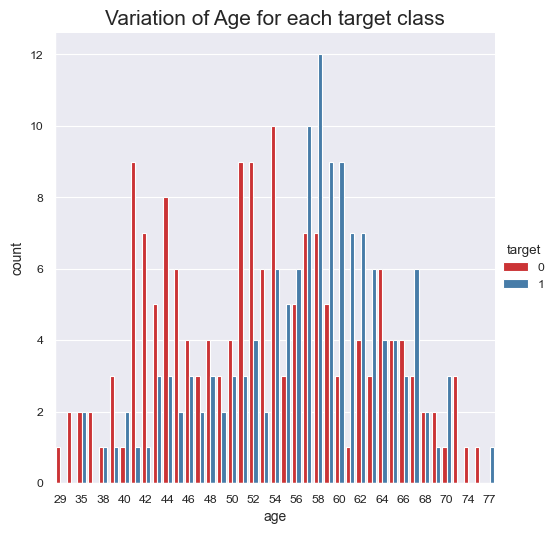

In [184]:
sns.set_context("paper", font_scale=1, rc={"font.size": 3, "axes.titlesize": 15, "axes.labelsize": 10})
ax_ = sns.catplot(kind='count', data=df, x='age', hue='target',
                  order=df['age'].sort_values().unique(), palette='Set1')
ax_.ax.set_xticks(np.arange(0, df.age.unique().size, 2))
plt.title('Variation of Age for each target class')
plt.show()

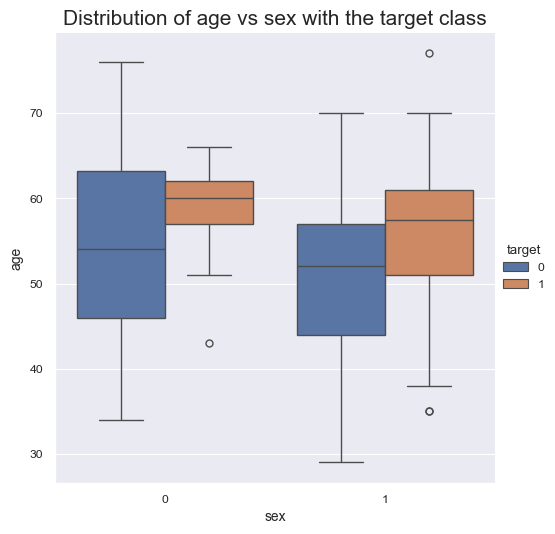

In [185]:
sns.catplot(kind='box', data=df, y='age', x='sex', hue='target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

# IV. Encoding

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [187]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# V. Train and Test Models

In [188]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [189]:
accuracy_models = {}

## <span style="font-size: 20px;">*1. K-Nearest Neighbor*</span>

In [190]:
df_knn = df_origin.copy()

imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(imputer.fit_transform(df_knn), columns=df_knn.columns)

df_knn.iloc[nan_indies][['ca', 'thal']]

,ca,thal
87,0.0,5.4
166,0.6,3.0
192,0.6,7.0
266,0.0,3.8
287,1.6,7.0
302,0.0,3.0


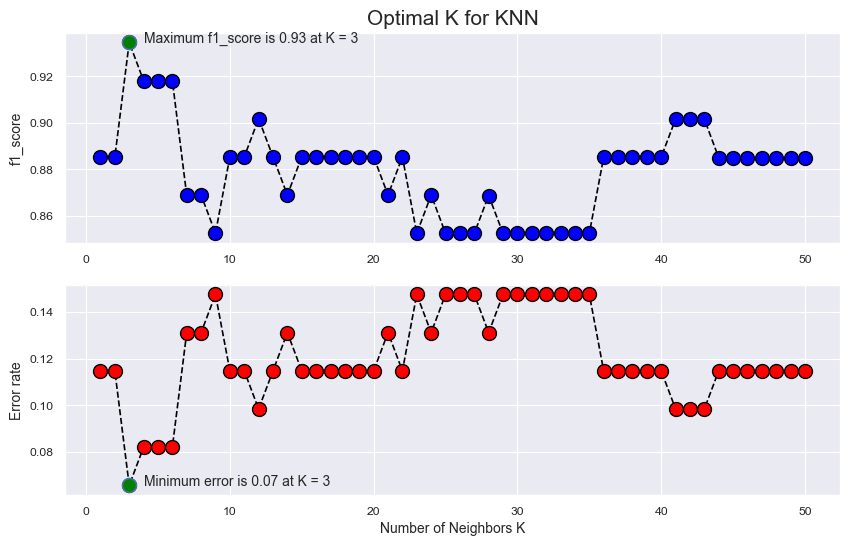

In [191]:
neighbors = list(range(1, 51))
knn_score = []
error_rate = []

for k in neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto', metric='euclidean')
    knn_clf.fit(X_train, y_train)
    y_pred_knn_clf = knn_clf.predict(X_test)
    knn_score.append(f1_score(y_test, y_pred_knn_clf, average='weighted'))
    error_rate.append(mean_squared_error(y_test, y_pred_knn_clf))
        
optimal_k_score = neighbors[knn_score.index(max(knn_score))]
optimal_k_error = neighbors[error_rate.index(min(error_rate))]
          
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)             
plt.plot(neighbors, knn_score, color='black', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)  
plt.plot(optimal_k_score, max(knn_score), marker='o', markerfacecolor='green', markersize=10)
plt.annotate(f"Maximum f1_score is {max(knn_score):.2f} at K = {optimal_k_score}",
              xy=(neighbors[optimal_k_score], max(knn_score)),
              xytext=(neighbors[optimal_k_score], max(knn_score)), fontsize=10)
plt.ylabel('f1_score'),        
plt.title('Optimal K for KNN')
         
plt.subplot(2, 1, 2)
plt.plot(neighbors, error_rate, color='black', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)  
plt.plot(optimal_k_error, min(error_rate), marker='o', markerfacecolor='green', markersize=10)
plt.annotate(f"Minimum error is {min(error_rate):.2f} at K = {optimal_k_error}",
              xy=(neighbors[optimal_k_error], min(error_rate)),
              xytext=(neighbors[optimal_k_error], min(error_rate)), fontsize=10)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error rate')

plt.show()

In [192]:
knn_clf = KNeighborsClassifier(n_neighbors=optimal_k_error, weights='distance', algorithm='auto', p=2, metric='minkowski')
knn_clf.fit(X_train, y_train)

y_pred_train_knn_clf = knn_clf.predict(X_train)
y_pred_knn_clf = knn_clf.predict(X_test)

print('Metrics of KNN for train set:')
print(classification_report(y_train, y_pred_train_knn_clf))
print("-----------------------------------------------------------")
print('Metrics of KNN for test set:')
print(classification_report(y_test, y_pred_knn_clf))

Metrics of KNN for train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       107

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

-----------------------------------------------------------
Metrics of KNN for test set:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [193]:
accuracy_models['knn'] = round(accuracy_score(y_test, y_pred_knn_clf), 5)
accuracy_models

{'knn': 0.93443}

## <span style="font-size: 20px;">*2. SVM*</span>

In [194]:
df_svm = df_origin.copy()

imputer = IterativeImputer(estimator=SVR(C=0.1, kernel='rbf', gamma=0), max_iter=10, random_state=random_state)
df_svm = pd.DataFrame(imputer.fit_transform(df_svm), columns=df_svm.columns)

df_svm.iloc[nan_indies][['ca', 'thal']]

,ca,thal
87,0.0,3.1
166,0.1,3.0
192,0.1,7.0
266,0.0,3.1
287,0.1,7.0
302,0.1,3.0


In [195]:
svc_clf = SVC(C=1, kernel='rbf', gamma=0.1, random_state=random_state)
svc_clf.fit(X_train, y_train)

y_pred_train_svc_clf = svc_clf.predict(X_train)
y_pred_svc_clf = svc_clf.predict(X_test)

print('Metrics of SVC for train set:')
print(classification_report(y_train, y_pred_train_svc_clf))
print("-----------------------------------------------------------")
print('Metrics of SVC for test set:')
print(classification_report(y_test, y_pred_svc_clf))

Metrics of SVC for train set:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       135
           1       0.96      0.86      0.91       107

    accuracy                           0.92       242
   macro avg       0.93      0.92      0.92       242
weighted avg       0.92      0.92      0.92       242

-----------------------------------------------------------
Metrics of SVC for test set:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [196]:
accuracy_models['svc'] = round(accuracy_score(y_test, y_pred_svc_clf), 5)
accuracy_models

{'knn': 0.93443, 'svc': 0.90164}

## <span style="font-size: 20px;">*3. GaussianNB*</span>

In [197]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

y_pred_train_gnb_clf = gnb_clf.predict(X_train)
y_pred_gnb_clf = gnb_clf.predict(X_test)

print('Metrics of GaussianNB for train set:')
print(classification_report(y_train, y_pred_train_gnb_clf))
print("-----------------------------------------------------------")
print('Metrics of GaussianNB for test set:')
print(classification_report(y_test, y_pred_gnb_clf))

Metrics of GaussianNB for train set:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       135
           1       0.86      0.78      0.82       107

    accuracy                           0.85       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.85      0.85       242

-----------------------------------------------------------
Metrics of GaussianNB for test set:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [198]:
accuracy_models['gnb'] = round(accuracy_score(y_test, y_pred_gnb_clf), 5)
accuracy_models

{'knn': 0.93443, 'svc': 0.90164, 'gnb': 0.83607}

## <span style="font-size: 20px;">*4. Decision Tree*</span>

In [199]:
df_dt = df_origin.copy()

imputer = IterativeImputer(
    estimator=DecisionTreeRegressor(
        ccp_alpha=0, random_state=random_state, min_samples_leaf=1, max_features=15),
    max_iter=10, random_state=random_state)
df_dt = pd.DataFrame(imputer.fit_transform(df_dt), columns=df_dt.columns)

df_dt.iloc[nan_indies][['ca', 'thal']]

,ca,thal
87,0.0,3.0
166,0.0,3.0
192,1.0,7.0
266,0.0,6.0
287,0.0,7.0
302,0.0,3.0


In [200]:
dt_clf = DecisionTreeClassifier(ccp_alpha=0.1, criterion='gini',
                                max_depth=10, min_samples_split=2, random_state=random_state)
dt_clf.fit(X_train, y_train)

y_pred_train_dt_clf = dt_clf.predict(X_train)
y_pred_dt_clf = dt_clf.predict(X_test)

print('Metrics of DecisionTreeClassifier for train set:')
print(classification_report(y_train, y_pred_train_dt_clf))
print("-----------------------------------------------------------")
print('Metrics of DecisionTreeClassifier for test set:')
print(classification_report(y_test, y_pred_dt_clf))

Metrics of DecisionTreeClassifier for train set:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       135
           1       0.71      0.72      0.72       107

    accuracy                           0.75       242
   macro avg       0.74      0.74      0.74       242
weighted avg       0.75      0.75      0.75       242

-----------------------------------------------------------
Metrics of DecisionTreeClassifier for test set:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78        29
           1       0.78      0.88      0.82        32

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [201]:
accuracy_models['dt'] = round(accuracy_score(y_test, y_pred_dt_clf), 5)
accuracy_models

{'knn': 0.93443, 'svc': 0.90164, 'gnb': 0.83607, 'dt': 0.80328}

## <span style="font-size: 20px;">*5. Random Forest*</span>

In [202]:
df_rf = df_origin.copy()

imputer = IterativeImputer(estimator=RandomForestRegressor(
    random_state=random_state, min_samples_leaf=5, max_features=5), max_iter=10, random_state=random_state)
df_rf = pd.DataFrame(imputer.fit_transform(df_rf), columns=df_rf.columns)

df_rf.iloc[nan_indies][['ca', 'thal']]

,ca,thal
87,0.000000,3.236788
166,0.140119,3.000000
192,0.518786,7.000000
266,0.000000,6.400106
287,0.299644,7.000000
302,0.123735,3.000000


In [203]:
rf_clf = RandomForestClassifier(criterion='gini', max_depth=10, max_features=5,
                                min_samples_leaf=5, n_estimators=10, random_state=random_state)
rf_clf.fit(X_train, y_train)

y_pred_train_rf_clf = rf_clf.predict(X_train)
y_pred_rf_clf = rf_clf.predict(X_test)

print('Metrics of RandomForestClassifier for train set:')
print(classification_report(y_train, y_pred_train_rf_clf))
print("-----------------------------------------------------------")
print('Metrics of RandomForestClassifier for test set:')
print(classification_report(y_test, y_pred_rf_clf))

Metrics of RandomForestClassifier for train set:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       135
           1       0.94      0.91      0.92       107

    accuracy                           0.93       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.93      0.93      0.93       242

-----------------------------------------------------------
Metrics of RandomForestClassifier for test set:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [204]:
accuracy_models['rf'] = round(accuracy_score(y_test, y_pred_rf_clf), 5)
accuracy_models

{'knn': 0.93443, 'svc': 0.90164, 'gnb': 0.83607, 'dt': 0.80328, 'rf': 0.88525}

## <span style="font-size: 20px;">*6. Adaboost*</span>

In [205]:
df_ada = df_origin.copy()

imputer = IterativeImputer(estimator=AdaBoostRegressor(
    learning_rate=0.1, random_state=random_state), max_iter=10, random_state=random_state)
df_ada = pd.DataFrame(imputer.fit_transform(df_ada), columns=df_ada.columns)

df_ada.iloc[nan_indies][['ca', 'thal']]

,ca,thal
87,0.000000,3.114286
166,0.357843,3.000000
192,0.375796,7.000000
266,0.000000,6.241935
287,0.403361,7.000000
302,0.189655,3.000000


In [206]:
ada_clf = AdaBoostClassifier(
    n_estimators=50, learning_rate=0.8, random_state=random_state)
ada_clf.fit(X_train, y_train)

y_pred_train_ada_clf = ada_clf.predict(X_train)
y_pred_ada_clf = ada_clf.predict(X_test)

print('Metrics of AdaBoostClassifier for train set:')
print(classification_report(y_train, y_pred_train_ada_clf))
print("-----------------------------------------------------------")
print('Metrics of AdaBoostClassifier for test set:')
print(classification_report(y_test, y_pred_ada_clf))

Metrics of AdaBoostClassifier for train set:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       135
           1       0.92      0.91      0.91       107

    accuracy                           0.92       242
   macro avg       0.92      0.92      0.92       242
weighted avg       0.92      0.92      0.92       242

-----------------------------------------------------------
Metrics of AdaBoostClassifier for test set:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [207]:
accuracy_models['ada'] = round(accuracy_score(y_test, y_pred_ada_clf), 5)
accuracy_models

{'knn': 0.93443,
 'svc': 0.90164,
 'gnb': 0.83607,
 'dt': 0.80328,
 'rf': 0.88525,
 'ada': 0.83607}

## <span style="font-size: 20px;">*7. Gradient Boost*</span>

In [208]:
df_grad = df_origin.copy()

imputer = IterativeImputer(estimator=GradientBoostingRegressor(
    learning_rate=0.1, random_state=random_state), max_iter=10, random_state=random_state)
df_grad = pd.DataFrame(imputer.fit_transform(df_grad), columns=df_grad.columns)

df_grad.iloc[nan_indies][['ca', 'thal']]

,ca,thal
87,0.000000,3.165222
166,0.296395,3.000000
192,0.382951,7.000000
266,0.000000,6.648864
287,0.105176,7.000000
302,0.019068,3.000000


In [209]:
grad_clf = GradientBoostingClassifier(
    learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)
grad_clf.fit(X_train, y_train)

y_pred_train_grad_clf = grad_clf.predict(X_train)
y_pred_grad_clf = grad_clf.predict(X_test)

print('Metrics of GradientBoostingClassifier for train set:')
print(classification_report(y_train, y_pred_train_grad_clf))
print("-----------------------------------------------------------")
print('Metrics of GradientBoostingClassifier for test set:')
print(classification_report(y_test, y_pred_grad_clf))

Metrics of GradientBoostingClassifier for train set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       135
           1       1.00      0.99      1.00       107

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

-----------------------------------------------------------
Metrics of GradientBoostingClassifier for test set:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [210]:
accuracy_models['grad'] = round(accuracy_score(y_test, y_pred_grad_clf), 5)
accuracy_models

{'knn': 0.93443,
 'svc': 0.90164,
 'gnb': 0.83607,
 'dt': 0.80328,
 'rf': 0.88525,
 'ada': 0.83607,
 'grad': 0.85246}

## <span style="font-size: 20px;">*8. XGBoost*</span>

In [211]:
df_xg = df_origin.copy()

imputer = IterativeImputer(estimator=XGBRegressor(),
                           max_iter=10, random_state=random_state)
df_xg = pd.DataFrame(imputer.fit_transform(df_xg), columns=df_xg.columns)

df_xg.iloc[nan_indies][['ca', 'thal']]

,ca,thal
87,0.000000,3.525963
166,0.050280,3.000000
192,0.563513,7.000000
266,0.000000,6.543390
287,0.664101,7.000000
302,-0.108986,3.000000


In [212]:
xg_clf = XGBClassifier(objective="binary:logistic",
                       random_state=42, n_estimators=100)
xg_clf.fit(X_train, y_train)

y_pred_train_xg_clf = xg_clf.predict(X_train)
y_pred_xg_clf = xg_clf.predict(X_test)

print('Metrics of XGBClassifier for train set:')
print(classification_report(y_train, y_pred_train_xg_clf))
print("-----------------------------------------------------------")
print('Metrics of XGBClassifier for test set:')
print(classification_report(y_test, y_pred_xg_clf))

Metrics of XGBClassifier for train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       107

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

-----------------------------------------------------------
Metrics of XGBClassifier for test set:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [213]:
accuracy_models['xg'] = round(accuracy_score(y_test, y_pred_xg_clf), 5)
accuracy_models

{'knn': 0.93443,
 'svc': 0.90164,
 'gnb': 0.83607,
 'dt': 0.80328,
 'rf': 0.88525,
 'ada': 0.83607,
 'grad': 0.85246,
 'xg': 0.86885}

## <span style="font-size: 20px;">*9. Stack*</span>

In [214]:
clf_models = [('dt', dt_clf), ('rf', rf_clf), ('knn', knn_clf),
              ('grad', grad_clf), ('ada', ada_clf), ('svc', svc_clf)]
meta_model = XGBClassifier()

stack_clf = StackingClassifier(
    estimators=clf_models, final_estimator=meta_model)
stack_clf.fit(X_train, y_train)

y_pred_train_stack_clf = stack_clf.predict(X_train)
y_pred_stack_clf = stack_clf.predict(X_test)

print('Metrics of StackingClassifier for train set:')
print(classification_report(y_train, y_pred_train_stack_clf))
print("-----------------------------------------------------------")
print('Metrics of StackingClassifier for test set:')
print(classification_report(y_test, y_pred_stack_clf))

Metrics of StackingClassifier for train set:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       135
           1       0.90      0.89      0.89       107

    accuracy                           0.90       242
   macro avg       0.90      0.90      0.90       242
weighted avg       0.90      0.90      0.90       242

-----------------------------------------------------------
Metrics of StackingClassifier for test set:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [215]:
accuracy_models['stack'] = round(accuracy_score(y_test, y_pred_stack_clf), 5)
accuracy_models

{'knn': 0.93443,
 'svc': 0.90164,
 'gnb': 0.83607,
 'dt': 0.80328,
 'rf': 0.88525,
 'ada': 0.83607,
 'grad': 0.85246,
 'xg': 0.86885,
 'stack': 0.88525}

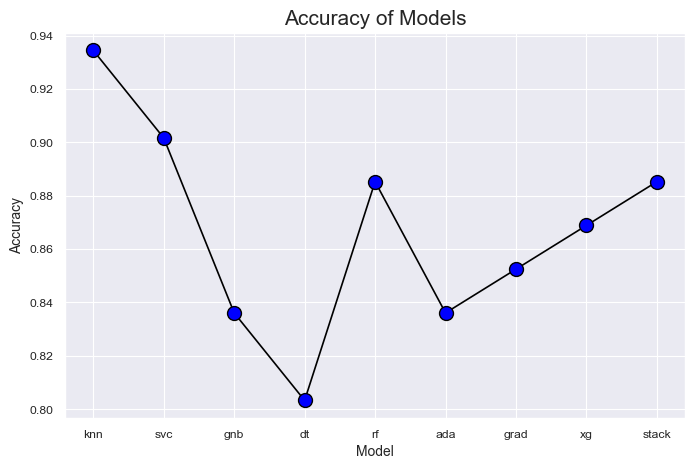

In [216]:
plt.figure(figsize=(8, 5))

plt.plot(accuracy_models.keys(), accuracy_models.values(),
         color='black', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')

plt.show()

# VI. Features

<Axes: ylabel='None'>

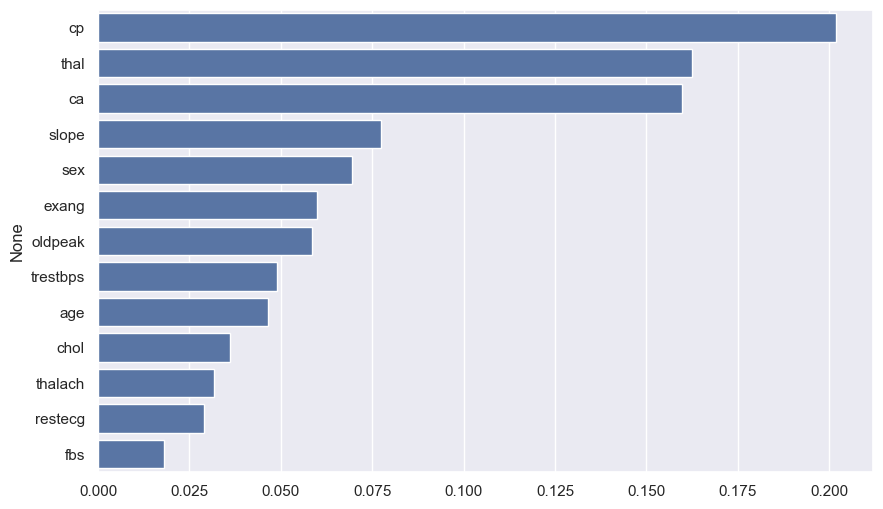

In [217]:
feature_importances = xg_clf.feature_importances_

sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]

sns.set_theme(rc={'figure.figsize':(10, 6)})
sns.barplot(x=sorted_importances, y=df.columns[sorted_indices])